In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore") 

In [24]:
dataset=pd.read_csv("SampleSuperstore.csv") 

In [25]:
dataset.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


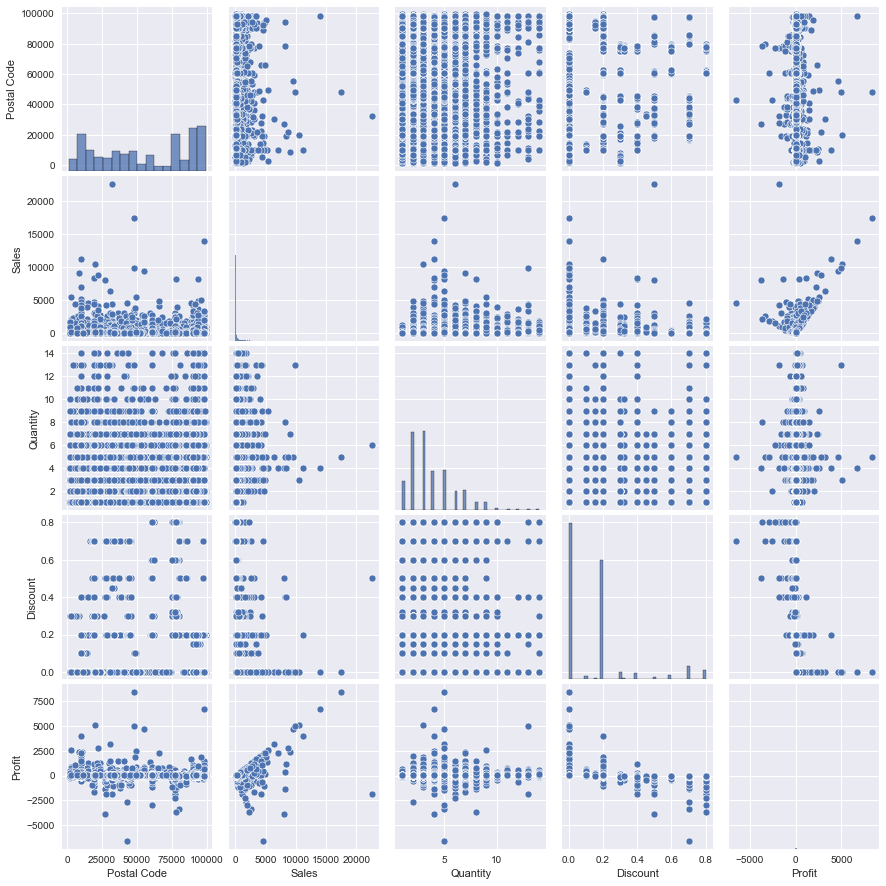

In [26]:
import seaborn as sns
sns.pairplot(dataset) 

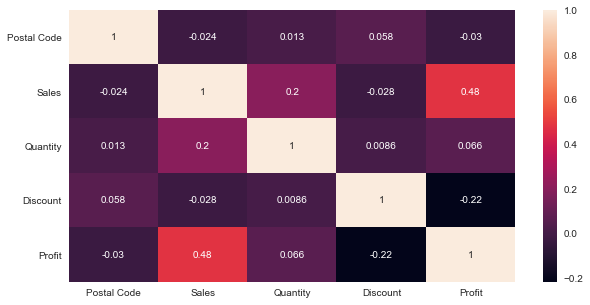

In [27]:
# finding the pairwise correlation between and columns and visualising using heatmaps
dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show() 

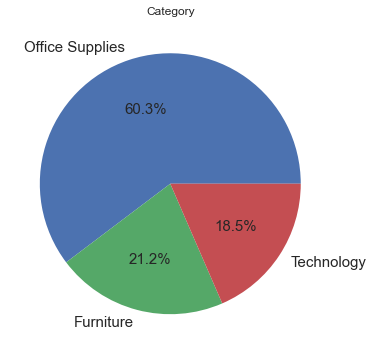

In [28]:
plt.figure(figsize=(6,6))
textprops ={"fontsize":15}
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index, autopct='%1.1f%%', textprops=textprops) 
plt.show() 

<Figure size 720x1152 with 0 Axes>

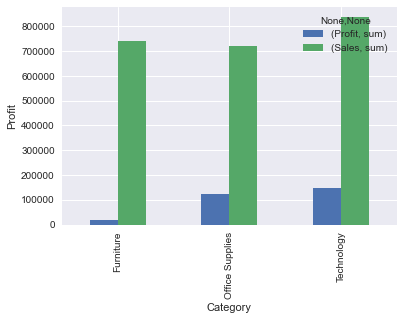

In [29]:
plt.figure(figsize=(10,16))
dataset.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show() 

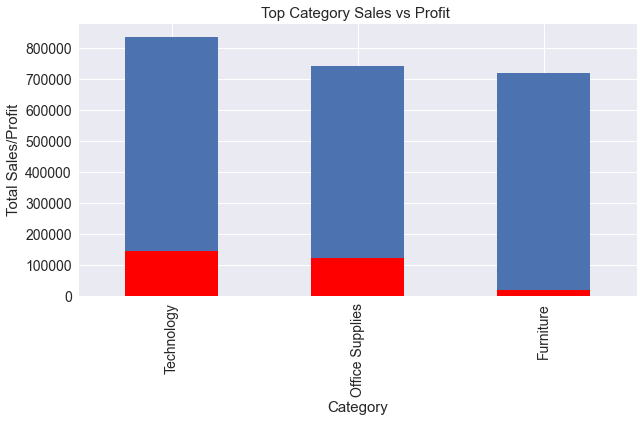

In [30]:
top_category_s=dataset.groupby("Category").Sales.sum().nlargest(n=100)
top_category_p=dataset.groupby("Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize=(10,5), fontsize=14)
top_category_p.plot(kind = 'bar',figsize=(10,5), fontsize=14,color='red')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Sales/Profit', fontsize=15)
plt.title("Top Category Sales vs Profit ", fontsize=15)
plt.show() 

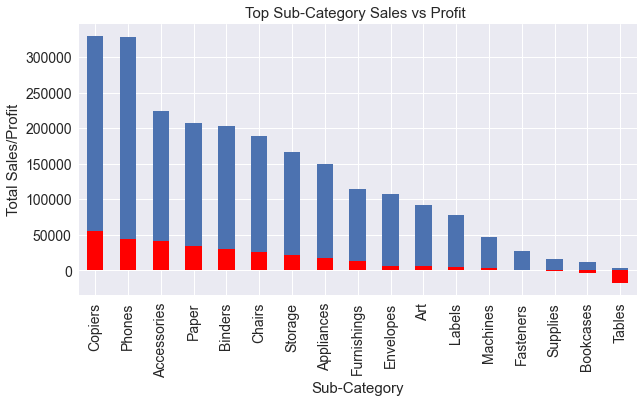

In [31]:

top_subcategory_s=dataset.groupby("Sub-Category").Sales.sum().nlargest(n=100)

top_subcategory_p=dataset.groupby("Sub-Category").Profit.sum().nlargest(n=100)


plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize=(10,5), fontsize=14)
top_subcategory_p.plot(kind = 'bar',figsize=(10,5), fontsize=14,color='red')
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Total Sales/Profit', fontsize=15)
plt.title("Top Sub-Category Sales vs Profit ", fontsize=15)
plt.show() 

<AxesSubplot:ylabel='Sub-Category'>

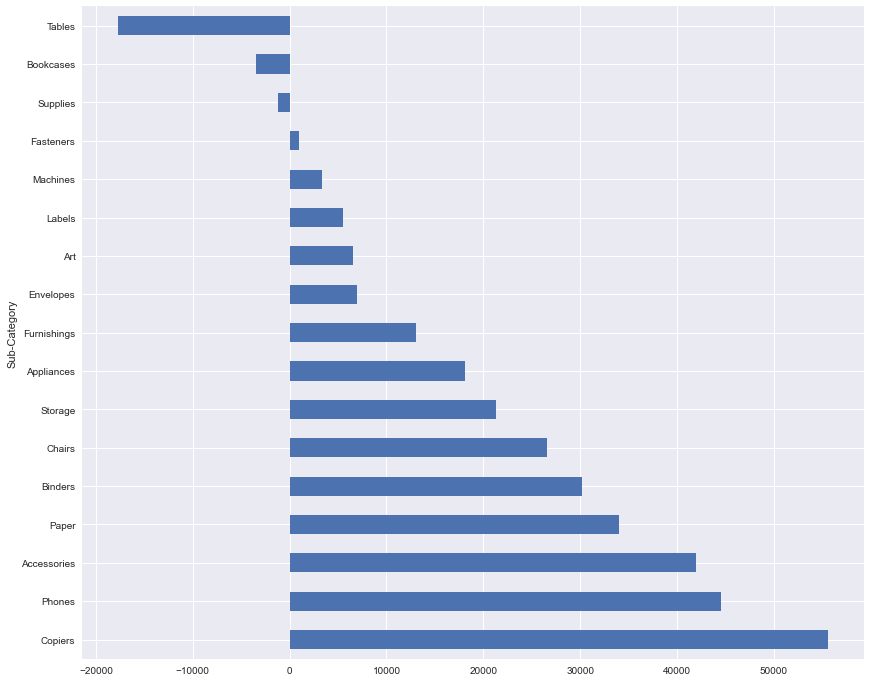

In [32]:

plt.figure(figsize=(14,12))
statewise=dataset.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

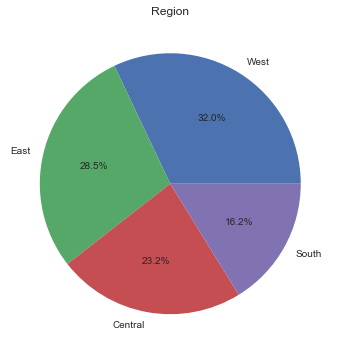

In [33]:
plt.figure(figsize=(6,6))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index, autopct='%1.1f%%')
plt.show()

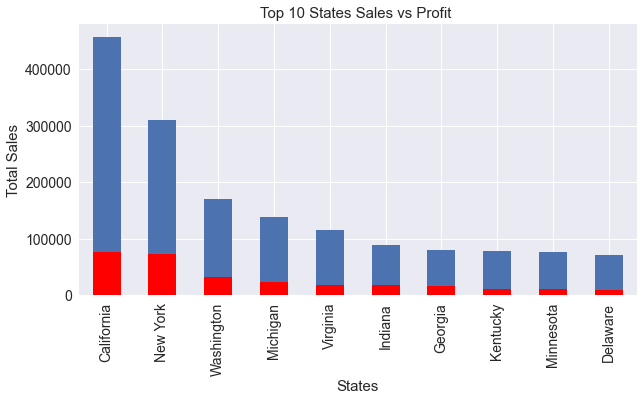

In [35]:

top_states_s=dataset.groupby("State").Sales.sum().nlargest(n=10)

top_states_p=dataset.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize=(10,5), fontsize=14)
top_states_p.plot(kind = 'bar',figsize=(10,5), fontsize=14,color='red')
plt.xlabel('States', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.title("Top 10 States Sales vs Profit ", fontsize=15)
plt.show() 


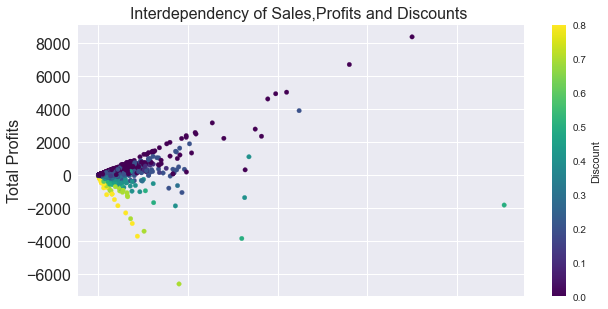

In [40]:
plt.style.use('seaborn')
dataset.plot(kind="scatter", figsize=(10,5), x="Sales", y="Profit", c="Discount", s=20, fontsize=16, colormap='viridis')
plt.ylabel('Total Profits', fontsize= 16)
plt.title("Interdependency of Sales,Profits and Discounts ", fontsize=16)
plt.show() 